## Observations and Insights 

In [1]:
#%matplotlib notebook

In [127]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import variation
from scipy.stats import stats
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# data = pd.concat([mouse_metadata, study_results], ignore_index=True).groupby('Mouse ID')
data = pd.merge(mouse_metadata, study_results, how = "outer", on='Mouse ID')


In [128]:
clean_data = data.drop_duplicates(subset=["Mouse ID", "Timepoint", "Drug Regimen"])
len(clean_data)

1888

In [129]:
# Checking the number of mice in the DataFrame.
total_mice = clean_data["Mouse ID"].value_counts()
# mice_count = total_mice["Mouse ID"].value_counts()
print(total_mice)

i635    10
a963    10
b128    10
c139    10
x773    10
        ..
f932     1
n482     1
b447     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64


In [130]:
# Checking the number of mice in the clean DataFrame.
len(total_mice)

249

In [131]:
mice_df = pd.DataFrame(clean_data)
mice_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary Statistics

In [132]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame(mice_df.groupby("Drug Regimen").count())

summary_stats["Mean Tumor Volume"] = pd.DataFrame(mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summary_stats["Median Tumor Volume"] = pd.DataFrame(mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
# reg_stnd_dev = stats.tstd(mice_df["Tumor Volume (mm3)"])
summary_stats["Tumor Vol Std. Dev"] = pd.DataFrame(mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summary_stats["Tumor Variance"] = pd.DataFrame(mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summary_stats["Tumor SEM"] = pd.DataFrame(mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
summary_stats["Mice Count"] = pd.DataFrame(mice_df.groupby("Drug Regimen")["Mouse ID"].nunique())

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [133]:

# reg_df = mice_df[["Drug Reg"]]

# reg_variance = st.variation(mice_df["Tumor Volume (mm3)"])
# reg_stnd_dev = stats.tstd(mice_df["Tumor Volume (mm3)"])
# reg_SEM = stats.sem(mice_df["Tumor Volume (mm3)"])
# print(reg_variance)
# print(reg_stnd_dev)
# reg_df.head(10)

In [134]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = summary_stats[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Vol Std. Dev", "Tumor Variance", "Tumor SEM", "Mice Count"]]
summary_stats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Vol Std. Dev,Tumor Variance,Tumor SEM,Mice Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346,25
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821,25
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236,25
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860,25
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466,25
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331,25
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862,25
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955,25
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111,24


## Bar Plots

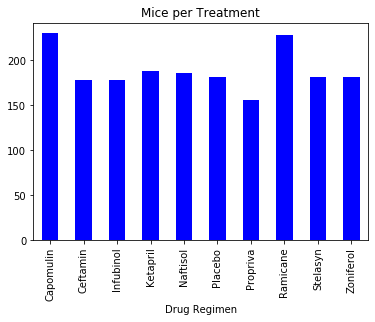

In [135]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_timepoint = pd.DataFrame(mice_df.groupby("Drug Regimen").count())
bar_mice_timepoint = mice_timepoint[["Mouse ID"]]
bar_mice_timepoint.plot(kind="bar", figsize=(6,4), color = "b", legend=False)
plt.title("Mice per Treatment")
plt.show()

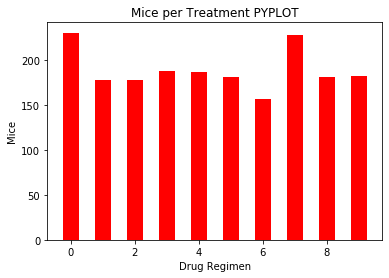

In [136]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
mice_plot = clean_data["Drug Regimen"].nunique()

x_axis = np.arange(len(mice_timepoint))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(6,4))
plt.bar(x_axis, mice_timepoint["Mouse ID"], color = "r", width = .5)
plt.title("Mice per Treatment PYPLOT")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")

plt.show()

## Pie Plots

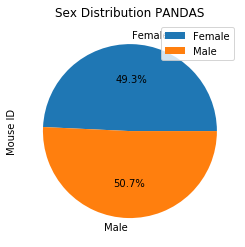

In [137]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# mice_df.head()
sex = pd.DataFrame(mice_df.groupby("Sex").count())[["Mouse ID"]]

sex.plot(kind="pie", labels=["Female", "Male"], autopct="%1.1f%%", subplots = "Mouse ID", legend = True)
plt.title("Sex Distribution PANDAS")
plt.show()

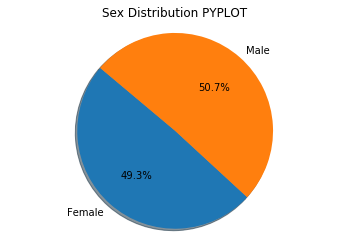

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#sizes = 
labels = ["Female", "Male"]
#explode = 
#colors = ["red", "blue"]
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

plt.pie(sex["Mouse ID"], labels=labels, autopct="%1.1f%%", shadow=True, startangle=140)
#sex.head()
plt.axis("equal")
plt.title("Sex Distribution PYPLOT")
plt.show()

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_vol = mice_df.loc[mice_df["Timepoint"] == 45, "Tumor Volume (mm3)"]

camp = mice_df.loc[mice_df['Drug Regimen'] == "Capomulin", :]
ram = mice_df.loc[mice_df['Drug Regimen'] == "Ramicane", :] 
inf = mice_df.loc[mice_df['Drug Regimen'] == "Infubinol", :]
ceft = mice_df.loc[mice_df['Drug Regimen'] == "Ceftamin", :]

#pd.DataFrame[]

final_tumor_camp = camp.loc[camp["Timepoint"] == 45, "Tumor Volume (mm3)"]
final_tumor_ram = ram.loc[ram["Timepoint"] == 45, "Tumor Volume (mm3)"]
final_tumor_inf = inf.loc[inf["Timepoint"] == 45, "Tumor Volume (mm3)"]
final_tumor_ceft = ceft.loc[ceft["Timepoint"] == 45, "Tumor Volume (mm3)"]


quartiles_camp = final_tumor_camp.quantile([.25,.5,.75])
lowerq_camp = quartiles_camp[0.25]
upperq_camp = quartiles_camp[0.75]
iqr_camp = upperq_camp-lowerq_camp

quartiles_ram = final_tumor_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

quartiles_inf = final_tumor_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

quartiles_ceft = final_tumor_ceft.quantile([.25,.5,.75])
lowerq_ceft = quartiles_ceft[0.25]
upperq_ceft = quartiles_ceft[0.75]
iqr_ceft = upperq_ceft-lowerq_ceft

print(f"The IQR for Campomulin is : {iqr_camp}")
print(f"The IQR for Ramicane is : {iqr_ram}")
print(f"The IQR for Infubinol is : {iqr_inf}")
print(f"The IQR for Ceftamin is : {iqr_ceft}")

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound_camp = lowerq_camp - (1.5*iqr_camp)
upper_bound_camp = upperq_camp + (1.5*iqr_camp)

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

lower_bound_ceft = lowerq_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upperq_ceft + (1.5*iqr_ceft)

#for tum_vol in final_tumor_vol:
#    outlier1 = tum_vol.loc["Tumor Volume (mm3)"] < {lower_bound_camp} < {upper_bound_camp} < outlier2

    
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

SyntaxError: invalid syntax (<ipython-input-139-05f0f9243a9e>, line 10)

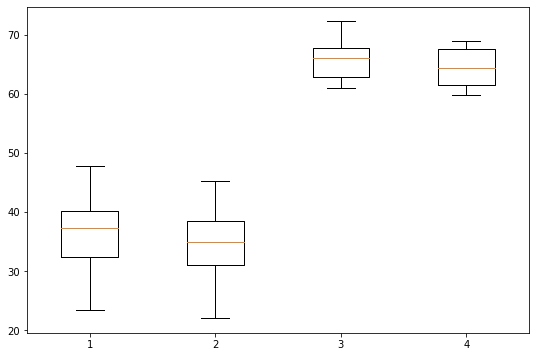

In [140]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



data_to_plot = [final_tumor_camp, final_tumor_ram, final_tumor_inf, final_tumor_ceft]

fig = plt.figure(1, figsize=(9,6))

ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

xlabel = data_to_plot

plt.show()

## Line and Scatter Plots

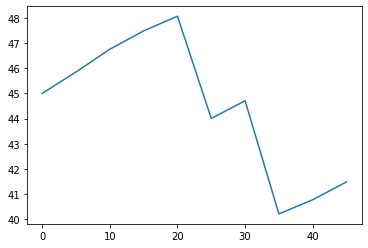

In [141]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
camp_df = camp.loc[camp["Mouse ID"] == "l509"]


timepoint = camp_df["Timepoint"]
tumor_volume = camp_df["Tumor Volume (mm3)"]

tumor_vol_lin = plt.plot(timepoint, tumor_volume)

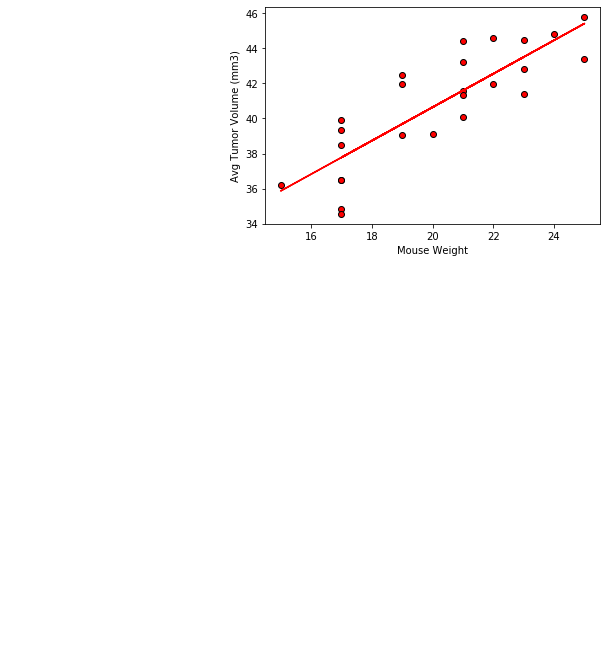

In [148]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


avg_df = camp.groupby("Mouse ID").mean()
avg_tum_vol = avg_df["Tumor Volume (mm3)"]
mouse_weight = avg_df["Weight (g)"]

#xaxis = mouse_weight
#yaxis = av_tum_vol

plt.scatter(mouse_weight, avg_tum_vol, marker="o", facecolors="red", edgecolors="black")


(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tum_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=11,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [157]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
print(f' The standard error value is {stderr}')
print(f' The correlation coefficient is {rvalue}')


 The standard error value is 0.1275435903320134
 The correlation coefficient is 0.8419363424694718


In [95]:
camp.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
